In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

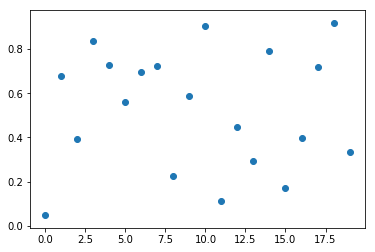

In [38]:
N = 20
x = np.arange(0, N, 1)
y = np.random.rand(N)

plt.scatter(x, y)

# 線形モデルの二乗誤差の最適化

線形モデルは $y=w^Tx$ で表される．

$n$ 個のサンプルに対する二乗誤差を $R(\omega)$ とすると，

\begin{align*}
  y &= \left(
    \begin{array}{c}
      y^{(1)} \\
      y^{(2)} \\
      \vdots \\
      y^{(n)}
    \end{array}
  \right),
  X = \left(
    \begin{array}{c}
      x^{(1)^T} \\
      x^{(2)^T} \\
      \vdots \\
      x^{(n)^T}
    \end{array}
  \right)\\
  R(\omega) &= (y-X\omega)^T(y-X\omega) \\
  \frac{\partial R(\omega)}{\partial \omega} &= 2X^T(y-Xw) \\
　\omega &= (X^TX)^{-1}X^T y
\end{align*}

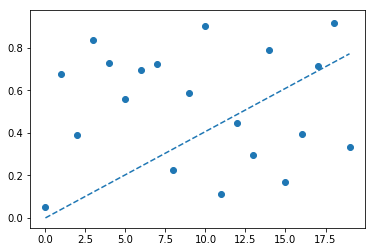

In [39]:
a = x.dot(x.T)
w = (1/a)*x.dot(y.T)

plt.scatter(x, y)
plt.plot(x, x*w, "--")

# カーネル法による関数推定

カーネル関数 $k(x, x')$ は2つの入力 $x$, $x'$ から計算される関数である．

今回は以下のカーネル関数を用いる．
\begin{align*}
    k(x, x')=\exp{(-\beta ||x-x'||^2)}
\end{align*}

$\beta$ を変えると凸度が変化する．
このカーネル関数は，$x=x'$ のとき最大値 1 を取り，直感的に**類似度**を示していることが分かる．

## 線形モデルとの対比

線形モデルでは線形和で表現していたが，カーネル関数を用いて $y$ を表すにはどうすれば良いだろうか．1つの入出力 $(x^{(i)}, y^{(i)})$ に対して以下のように設計する．
\begin{align*}
    y^{(i)} = \sum_{j=1}^n \alpha_j k(x^{(j)}, x^{(i)})
\end{align*}

これに対して，線形モデルと同様に二乗誤差を取ると，$\alpha$ という重みベクトルを最適化することが目標になる．

\begin{align*}
  K = \left(
    \begin{array}{cccc}
      k(x^{(1)}, x^{(1)}) & k(x^{(2)}, x^{(1)}) & \ldots & k(x^{(n)}, x^{(1)}) \\
      k(x^{(1)}, x^{(2)}) & k(x^{(2)}, x^{(2)}) & \ldots & k(x^{(n)}, x^{(2)}) \\
      \vdots & \vdots & \ddots & \vdots \\
      k(x^{(1)}, x^{(n)}) & k(x^{(2)}, x^{(n)}) & \ldots & k(x^{(n)}, x^{(n)})
    \end{array}
  \right)
\end{align*}

とおくと，二乗誤差の総和は，
\begin{align*}
    R_k(\alpha) = \sum_{i=1}^n (y^{(i)}-\sum_{j=1}^n \alpha_j k(x^{(j)}, x^{(i)}))^2 = (y-K\alpha)^T(y-K\alpha).
\end{align*}

よって，$K$ が正則なら$ \alpha = (K^T K)^{-1}K^T y$ が得られる．

更に言うと，$K$ は対称行列であるため，$(K^2)^{-1}Ky$となり，$\alpha = K^{-1} y$ と書ける．

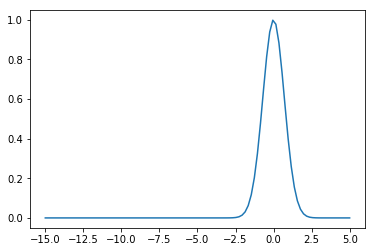

In [40]:
def k(x1, x2):
    beta = 1
    x = x1 - x2
    return np.exp(-beta * x.T * x)

# test
assert k(x[0], x[0]) == 1.0, "error"

xx = np.linspace(0, N, 100)
kernel_y = k(x[5], xx)
plt.plot(x[5]-xx, kernel_y)

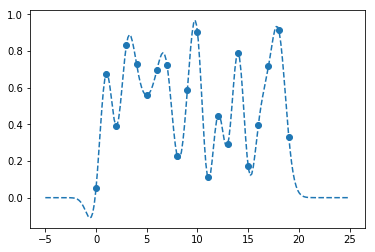

In [41]:
K = np.array([[k(x[i], x[j]) for j in range(N)] for i in range(N)])
a = np.linalg.inv(K).dot(y)

xx = np.linspace(-5, N+5, 200)
kernel_y = np.array([np.sum([a[j]*k(v, x[j]) for j in range(N)]) for v in xx])

plt.scatter(x, y)
plt.plot(xx, kernel_y, "--")

# 正則化

一見誤差が無いように見える．

カーネル関数を使ったモデルでは，サンプル数と同じだけ自由度があるため常に誤差の無い曲線を得ることが可能．

しかし，過学習を行う可能性が生じる．

過学習を防ぐために，正則化という方法を用いる．

正則化とは，誤差関数に余分な項を付け加えたものを最小科することによって，カーネル関数の表現能力を落とすというものである．

\begin{align*}
    R_{k,\lambda} = (y-K\alpha)^T(y-K\alpha)+\lambda \alpha^T \alpha
\end{align*}

$\lambda$ を0に近づければ，元の誤差関数に近づくため不安定な近似が得られる．

微分すると，
\begin{align*}
    \frac{\partial R_{k,\lambda}}{\partial \alpha} &= -K(y-K\alpha)+\lambda K\alpha = 0\\
    \alpha &= (K+\lambda I_n)^{-1} y
\end{align*}

汎化能力を最適化するように，$\lambda$ を決めるのは一般的に難しい問題である． 

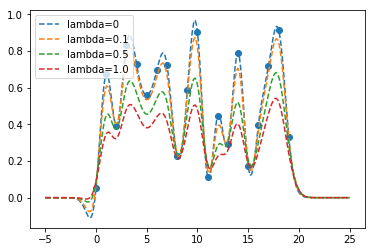

In [42]:
x_range = np.linspace(-5, N+5, 200)

l = 0
a = np.linalg.inv(K + l * np.identity(N)).dot(y)   
output = np.array([np.sum([a[j]*k(v, x[j]) for j in range(N)]) for v in x_range])
plt.plot(x_range, output, "--", label="lambda=0")

l = 0.1
a = np.linalg.inv(K + l * np.identity(N)).dot(y)   
output = np.array([np.sum([a[j]*k(v, x[j]) for j in range(N)]) for v in x_range])
plt.plot(x_range, output, "--", label="lambda=0.1")

l = 0.5
a = np.linalg.inv(K + l * np.identity(N)).dot(y)   
output = np.array([np.sum([a[j]*k(v, x[j]) for j in range(N)]) for v in x_range])
plt.plot(x_range, output, "--", label="lambda=0.5")

l = 1.0
a = np.linalg.inv(K + l * np.identity(N)).dot(y)   
output = np.array([np.sum([a[j]*k(v, x[j]) for j in range(N)]) for v in x_range])
plt.plot(x_range, output, "--", label="lambda=1.0")

plt.scatter(x, y)

plt.legend()

## 疑問点

- ハイパーパラメータが $\beta$ と $\lambda$ の2つが存在していて，適切に設定しなければならない．この最適化を考えるのはどうやれば良いのか知りたい．
- 人間の目では上手く汎化できているように見えるということがグラフから分かるが，これは二次元の関数だからそういうふうに人間が判断できるだけであって，高次元で上手く汎化できている・汎化できていないということが分からない．これをどうやって知るのかを見つけたい．
- カーネル関数の設計法について (これは5章でやっているの